In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Set display options to show all columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

#Linear regression models import
from sklearn.linear_model import LogisticRegression

# to split the data
from sklearn.model_selection import train_test_split

df = pd.read_csv("pima-indians-diabetes-2.csv")
df.sample(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
448,0,104,64,37,64,33.6,0.510,22,1
94,2,142,82,18,64,24.7,0.761,21,0
535,4,132,0,0,0,32.9,0.302,23,1
405,2,123,48,32,165,42.1,0.520,26,0
342,1,0,68,35,0,32.0,0.389,22,0
378,4,156,75,0,0,48.3,0.238,32,1
750,4,136,70,0,0,31.2,1.182,22,1
521,3,124,80,33,130,33.2,0.305,26,0
239,0,104,76,0,0,18.4,0.582,27,0
65,5,99,74,27,0,29.0,0.203,32,0


In [2]:
df = pd.read_csv("pima-indians-diabetes-2.csv")
df.sample(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
669,9,154,78,30,100,30.9,0.164,45,0
243,6,119,50,22,176,27.1,1.318,33,1
609,1,111,62,13,182,24.0,0.138,23,0
660,10,162,84,0,0,27.7,0.182,54,0
332,1,180,0,0,0,43.3,0.282,41,1
557,8,110,76,0,0,27.8,0.237,58,0
474,4,114,64,0,0,28.9,0.126,24,0
130,4,173,70,14,168,29.7,0.361,33,1
176,6,85,78,0,0,31.2,0.382,42,0
228,4,197,70,39,744,36.7,2.329,31,0


In [3]:
# sns.pairplot(data=df,)

In [4]:
df.shape

(768, 9)

In [5]:
5/14

0.35714285714285715

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe(include='all')

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [9]:
# sns.pairplot(data=df)
# plt.show()

In [10]:
Y=df["class"]
# X=df.drop(["test"])
X = df.drop(["class"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

# Instantiate the model
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)
# Fit the model with the train data
print("Logistic")
print("Test::", model_lr.score(X_test, Y_test))
print("Train::", model_lr.score(X_train, Y_train))

Logistic
Test:: 0.7835497835497836
Train:: 0.7728119180633147


In [11]:
zero_removal_df = df

In [12]:
zero_removal_df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [13]:
zero_removal_df = df
zero_mean_removal_df = df
columns = ['Plas', 'Pres', 'skin', 'mass', 'pedi', 'age']
for col in columns:
    median = zero_removal_df[col].median()  # Calculate median for each column
    zero_removal_df[col] = zero_removal_df[col].replace(0, median)


In [14]:
Y=zero_mean_removal_df["class"]
# X=df.drop(["test"])
X = zero_removal_df.drop(["class"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

# Instantiate the model
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)
# Fit the model with the train data
print("Logistic Median")
print("Test::", model_lr.score(X_test, Y_test))
print("Train::", model_lr.score(X_train, Y_train))

Logistic Median
Test:: 0.7835497835497836
Train:: 0.7821229050279329


In [15]:
zero_mean_removal_df = df
columns = ['Plas', 'Pres', 'skin', 'mass', 'pedi', 'age']
for col in columns:
    mean = zero_mean_removal_df[col].mean()  # Calculate median for each column
    zero_mean_removal_df[col] = zero_mean_removal_df[col].replace(0, mean)


In [16]:
Y=zero_mean_removal_df["class"]
# X=df.drop(["test"])
X = zero_mean_removal_df.drop(["class"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

# Instantiate the model
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)
# Fit the model with the train data
print("Logistic Mean")
print("Test::", model_lr.score(X_test, Y_test))
print("Train::", model_lr.score(X_train, Y_train))

Logistic Mean
Test:: 0.7835497835497836
Train:: 0.7821229050279329


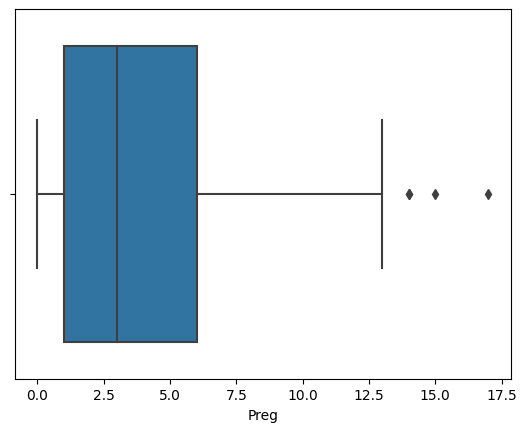

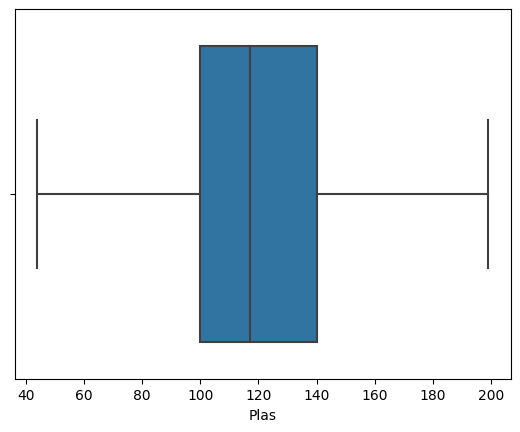

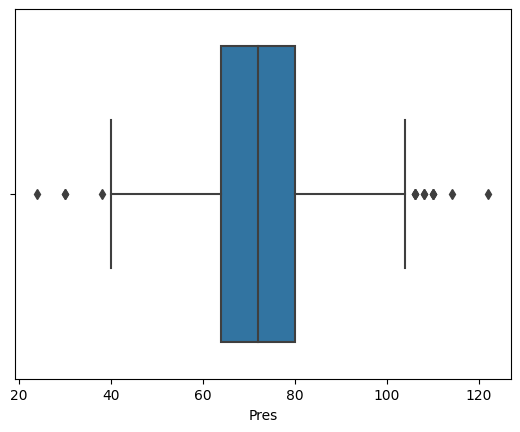

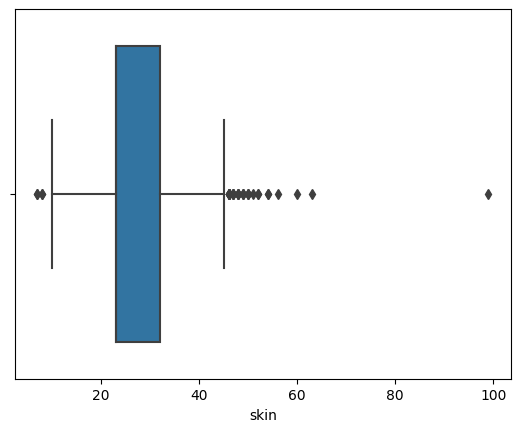

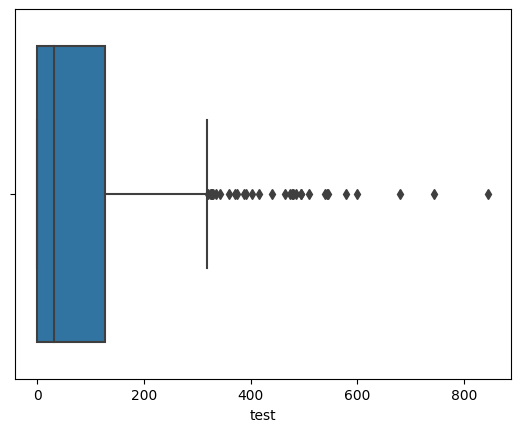

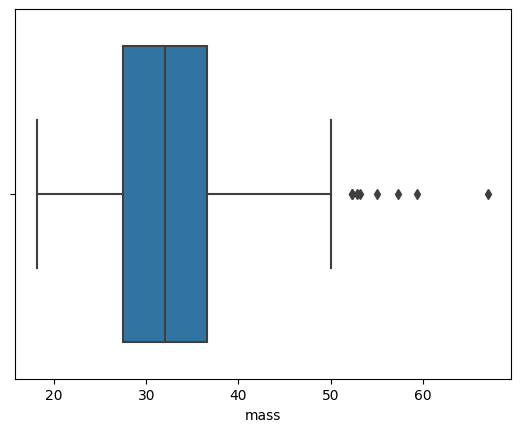

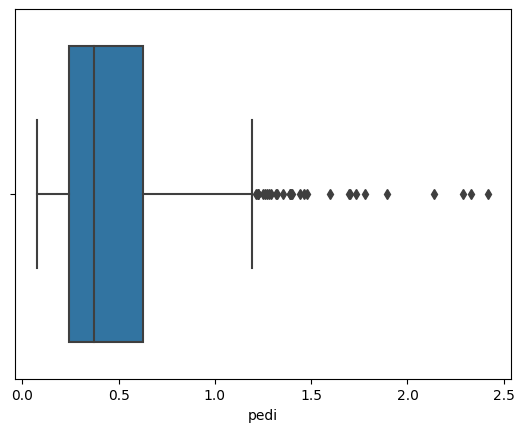

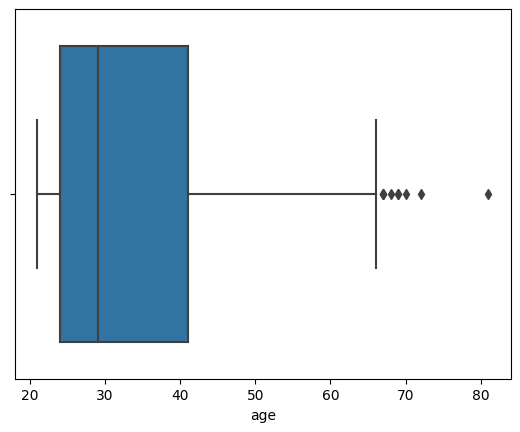

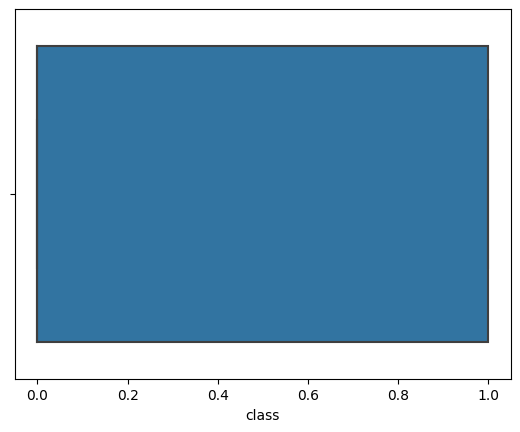

In [17]:
numeric_columns = df.select_dtypes(include=["number"])
for col in numeric_columns:
    sns.boxplot(x=col, data=df)
    plt.show()

In [18]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-1.5*IQR
    higher_range = Q3+1.5*IQR
    return lower_range, higher_range

outliers_columns = ["Preg", "Plas", "Pres", "skin", "test", "mass", "pedi", "age"]

cleaned_mean_df = zero_mean_removal_df

for outlier_col in outliers_columns:
    lower, upper = remove_outlier(zero_mean_removal_df[outlier_col])
    cleaned_mean_df[outlier_col] = np.where(cleaned_mean_df[outlier_col]>upper, upper, cleaned_mean_df[outlier_col])
    cleaned_mean_df[outlier_col] = np.where(cleaned_mean_df[outlier_col]<lower, lower, cleaned_mean_df[outlier_col])
    
cleaned_mean_df.sample(5)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
613,6.0,105.0,80.0,28.0,0.0,32.5,0.878,26.0,0
457,5.0,86.0,68.0,28.0,71.0,30.2,0.364,24.0,0
104,2.0,85.0,65.0,23.0,0.0,39.6,0.930,27.0,0
10,4.0,110.0,92.0,23.0,0.0,37.6,0.191,30.0,0
280,0.0,146.0,70.0,23.0,0.0,37.9,0.334,28.0,1


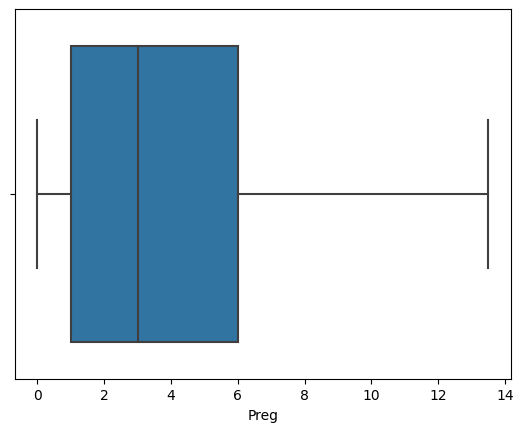

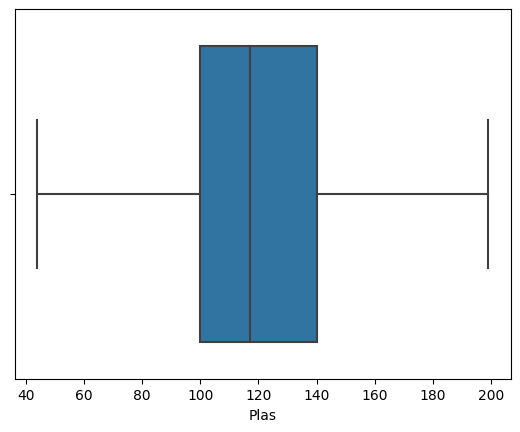

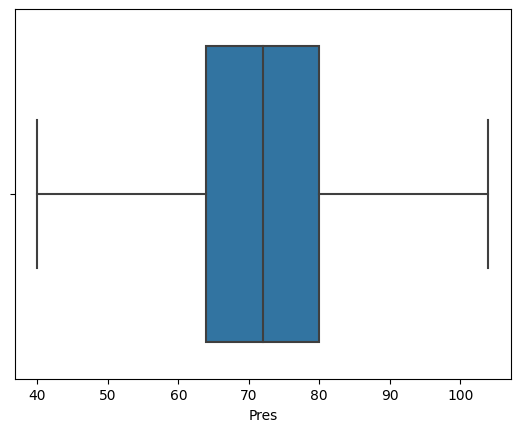

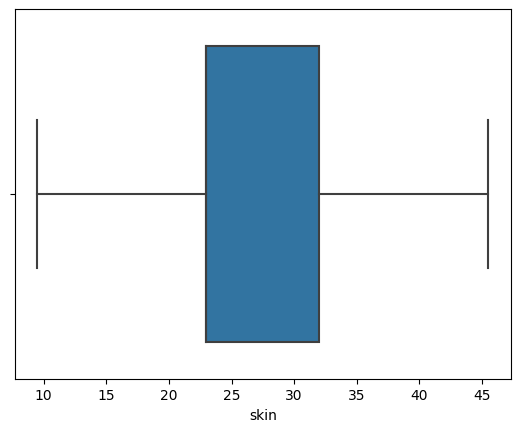

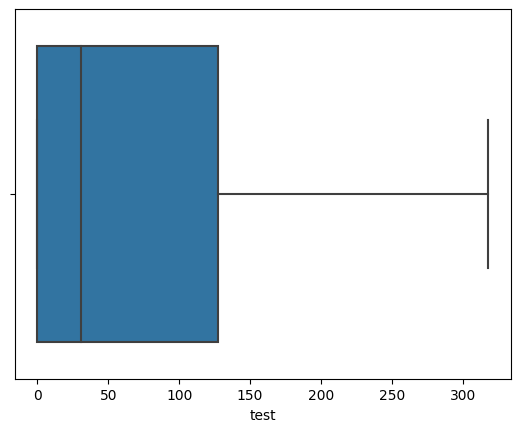

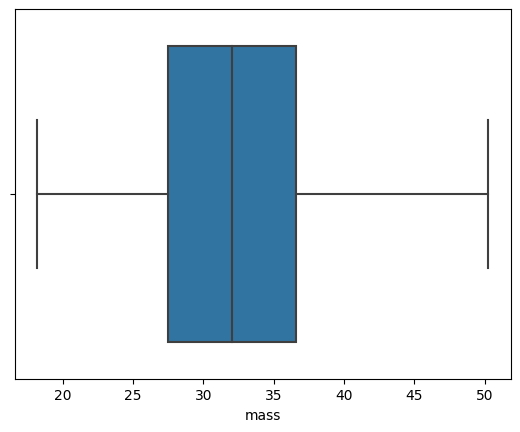

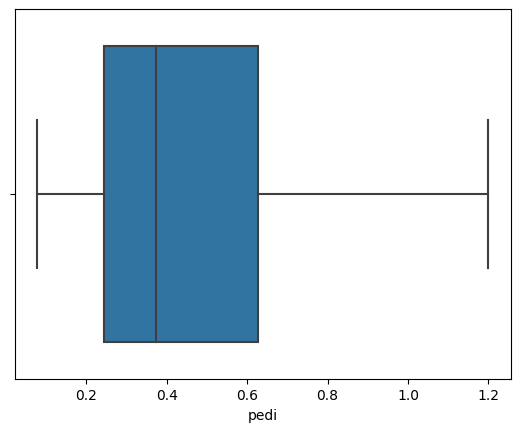

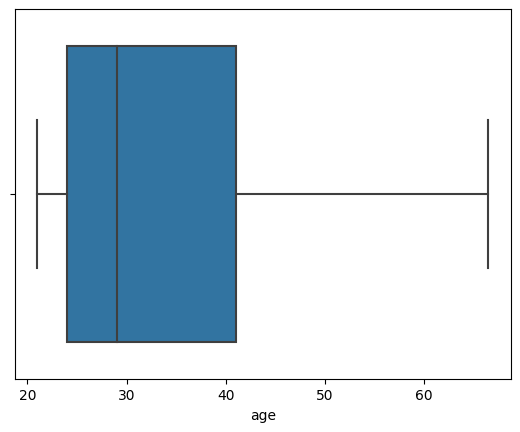

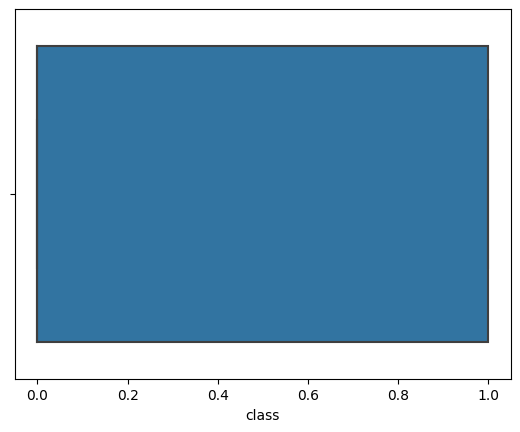

In [19]:
numeric_columns = cleaned_mean_df.select_dtypes(include=["number"])
for col in numeric_columns:
    sns.boxplot(x=col, data=df)
    plt.show()

In [20]:
Y=cleaned_mean_df["class"]
# X=df.drop(["test"])
X = cleaned_mean_df.drop(["class"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

# Instantiate the model
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)
# Fit the model with the train data
print("Logistic Mean after outlier")
print("Test::", model_lr.score(X_test, Y_test))
print("Train::", model_lr.score(X_train, Y_train))

Logistic Mean after outlier
Test:: 0.8008658008658008
Train:: 0.7746741154562383


In [72]:
# zero_removal_df,df, cleaned_mean_df

from sklearn.neighbors import KNeighborsClassifier
Y = df["class"]
X = df.drop(["class"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30, random_state=1)

for n in [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
    for alog in ['ball_tree', 'kd_tree', 'brute']:
        model_knn = KNeighborsClassifier(n_neighbors=n,algorithm=alog,p=1)
        model_knn.fit(X_train, Y_train)
        print("\nn_neighbors: ", n, "Alogrithm:", alog)
        print("Train:: ",  model_knn.score(X_train,Y_train))
        print("Test:: ", model_knn.score(X_test, Y_test))


n_neighbors:  5 Alogrithm: ball_tree
Train::  0.7932960893854749
Test::  0.7835497835497836

n_neighbors:  5 Alogrithm: kd_tree
Train::  0.7932960893854749
Test::  0.7835497835497836

n_neighbors:  5 Alogrithm: brute
Train::  0.7932960893854749
Test::  0.7835497835497836

n_neighbors:  6 Alogrithm: ball_tree
Train::  0.7728119180633147
Test::  0.7878787878787878

n_neighbors:  6 Alogrithm: kd_tree
Train::  0.7728119180633147
Test::  0.7878787878787878

n_neighbors:  6 Alogrithm: brute
Train::  0.7728119180633147
Test::  0.7878787878787878

n_neighbors:  7 Alogrithm: ball_tree
Train::  0.7895716945996276
Test::  0.7965367965367965

n_neighbors:  7 Alogrithm: kd_tree
Train::  0.7895716945996276
Test::  0.7965367965367965

n_neighbors:  7 Alogrithm: brute
Train::  0.7895716945996276
Test::  0.7965367965367965

n_neighbors:  8 Alogrithm: ball_tree
Train::  0.7728119180633147
Test::  0.7792207792207793

n_neighbors:  8 Alogrithm: kd_tree
Train::  0.7728119180633147
Test::  0.77922077922077

In [21]:
from sklearn.svm import SVR

Y = df["class"]
X = df.drop(["class"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30, random_state=1)

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model_svr = SVR(kernel=kernel)
    model_svr.fit(X_train, Y_train)
    print("\n Kernel: ", kernel)
    print("train: ",model_svr.score(X_train, Y_train))
    print("test: ", model_svr.score(X_test, Y_test))



Y = cleaned_mean_df["class"]
X = cleaned_mean_df.drop(["class"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30, random_state=1)

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model_svr = SVR(kernel=kernel)
    model_svr.fit(X_train, Y_train)
    print("\n cleaned_mean_df Kernel: ", kernel)
    print("train: ",model_svr.score(X_train, Y_train))
    print("test: ", model_svr.score(X_test, Y_test))



 Kernel:  linear
train:  0.2635238613167875
test:  0.3832924703328344

 Kernel:  poly
train:  0.24152001236545817
test:  0.34266252325408475

 Kernel:  rbf
train:  0.2353367459537279
test:  0.3263170633367992

 Kernel:  sigmoid
train:  -134.018008337818
test:  -122.63953948019446

 cleaned_mean_df Kernel:  linear
train:  0.2635238613167875
test:  0.3832924703328344

 cleaned_mean_df Kernel:  poly
train:  0.24152001236545817
test:  0.34266252325408475

 cleaned_mean_df Kernel:  rbf
train:  0.2353367459537279
test:  0.3263170633367992

 cleaned_mean_df Kernel:  sigmoid
train:  -134.018008337818
test:  -122.63953948019446


In [22]:
from sklearn.preprocessing import MinMaxScaler
min_max_scale = MinMaxScaler()

std_cleaned_df = cleaned_mean_df
std_df = df

for col in numeric_columns.columns:
    print("col:", col )
    std_cleaned_df[col] = min_max_scale.fit_transform(std_cleaned_df[[col]])
    std_df[col] = min_max_scale.fit_transform(std_df[[col]])

std_cleaned_Y = std_cleaned_df[["class"]]
std_cleaned_X = std_cleaned_df.drop(["class"], axis = 1)

col: Preg
col: Plas
col: Pres
col: skin
col: test
col: mass
col: pedi
col: age
col: class



n_neighbors: 5 alog:  ball_tree
Train::  0.8026070763500931
Test::  0.7445887445887446


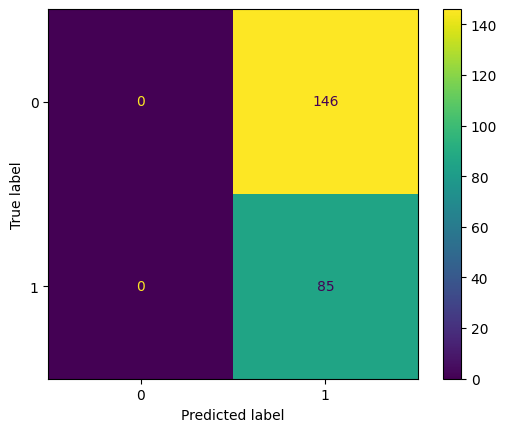


n_neighbors: 5 alog:  kd_tree
Train::  0.8026070763500931
Test::  0.7445887445887446


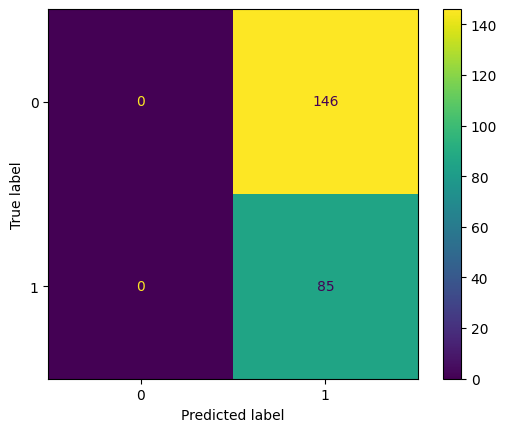


n_neighbors: 5 alog:  brute
Train::  0.8026070763500931
Test::  0.7445887445887446


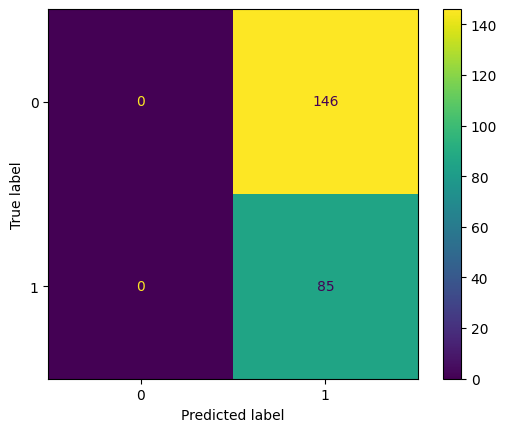


n_neighbors: 6 alog:  ball_tree
Train::  0.7914338919925512
Test::  0.7402597402597403


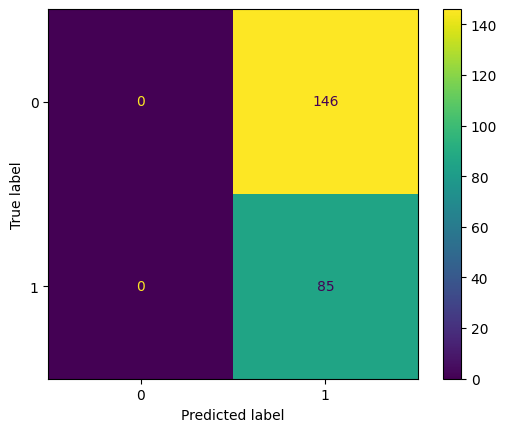


n_neighbors: 6 alog:  kd_tree
Train::  0.7914338919925512
Test::  0.7402597402597403


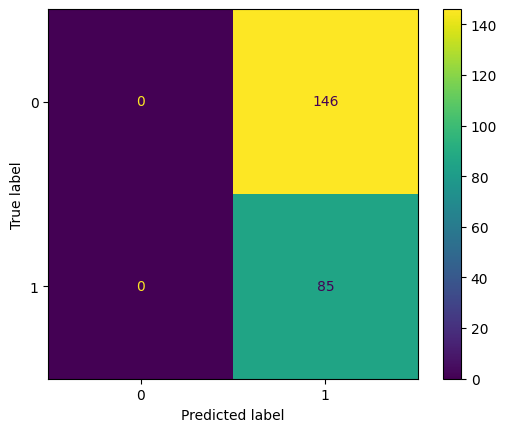


n_neighbors: 6 alog:  brute
Train::  0.7914338919925512
Test::  0.7402597402597403


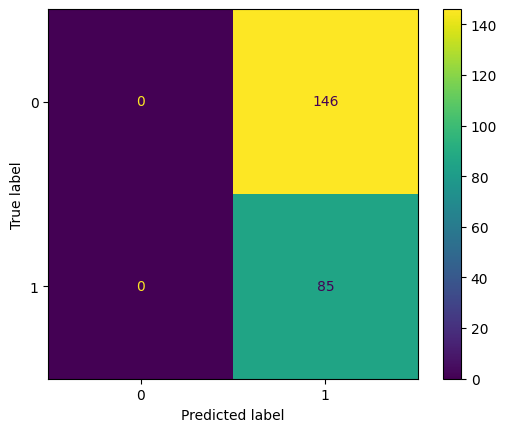


n_neighbors: 7 alog:  ball_tree
Train::  0.8100558659217877
Test::  0.7575757575757576


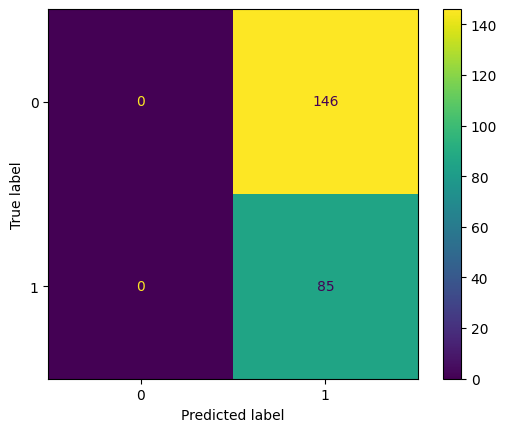


n_neighbors: 7 alog:  kd_tree
Train::  0.8100558659217877
Test::  0.7575757575757576


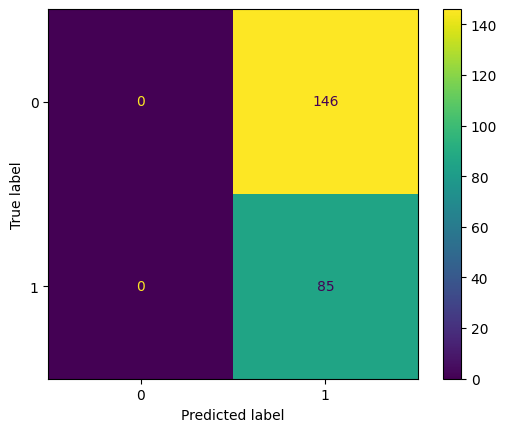


n_neighbors: 7 alog:  brute
Train::  0.8100558659217877
Test::  0.7575757575757576


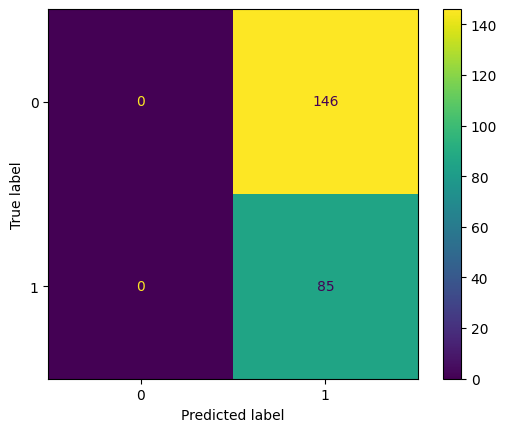


n_neighbors: 8 alog:  ball_tree
Train::  0.7821229050279329
Test::  0.7489177489177489


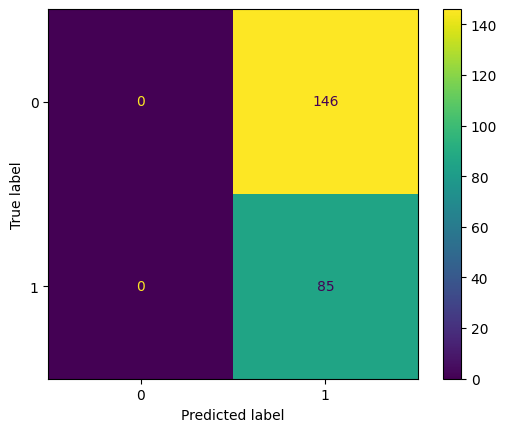


n_neighbors: 8 alog:  kd_tree
Train::  0.7821229050279329
Test::  0.7489177489177489


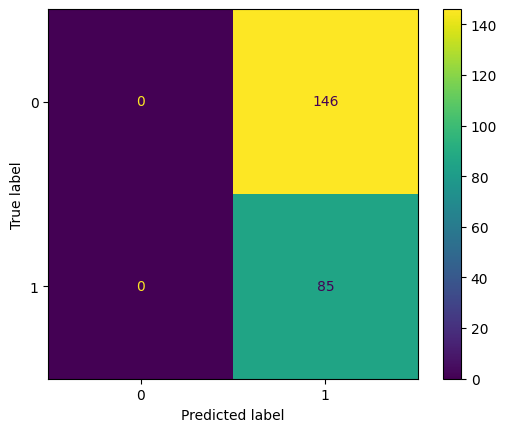


n_neighbors: 8 alog:  brute
Train::  0.7821229050279329
Test::  0.7489177489177489


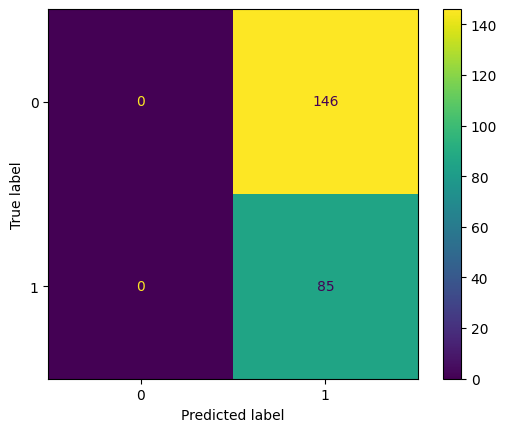


n_neighbors: 9 alog:  ball_tree
Train::  0.7839851024208566
Test::  0.7662337662337663


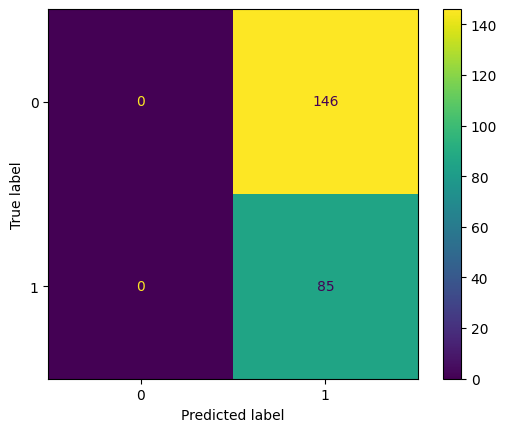


n_neighbors: 9 alog:  kd_tree
Train::  0.7839851024208566
Test::  0.7662337662337663


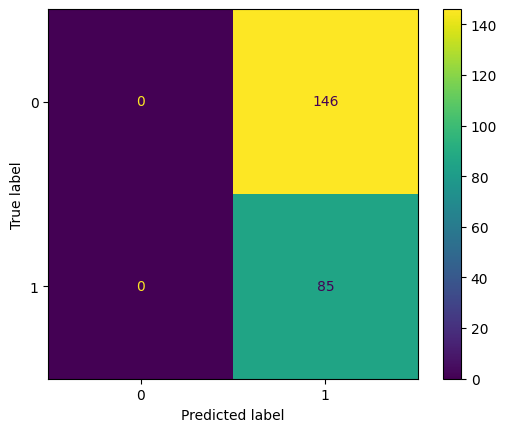


n_neighbors: 9 alog:  brute
Train::  0.7839851024208566
Test::  0.7662337662337663


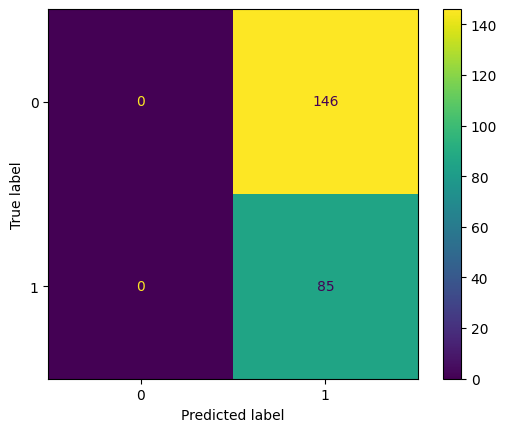


n_neighbors: 10 alog:  ball_tree
Train::  0.770949720670391
Test::  0.7532467532467533


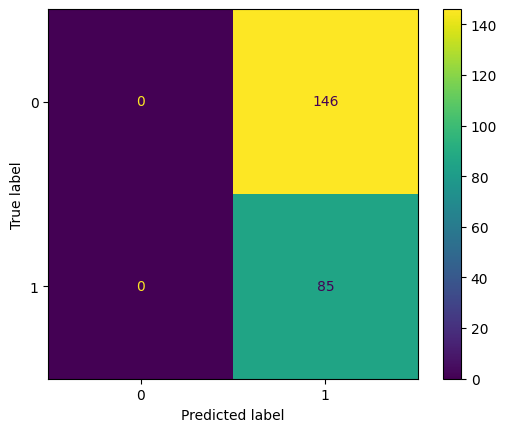


n_neighbors: 10 alog:  kd_tree
Train::  0.770949720670391
Test::  0.7532467532467533


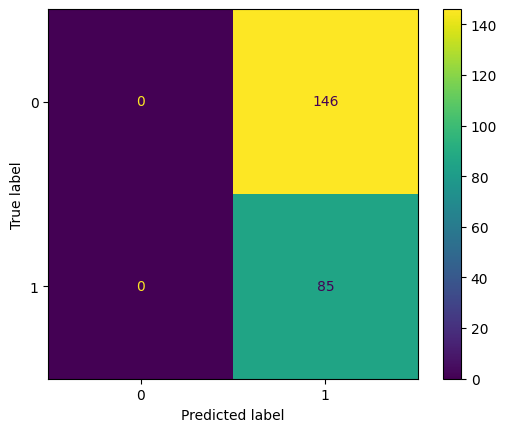


n_neighbors: 10 alog:  brute
Train::  0.770949720670391
Test::  0.7532467532467533


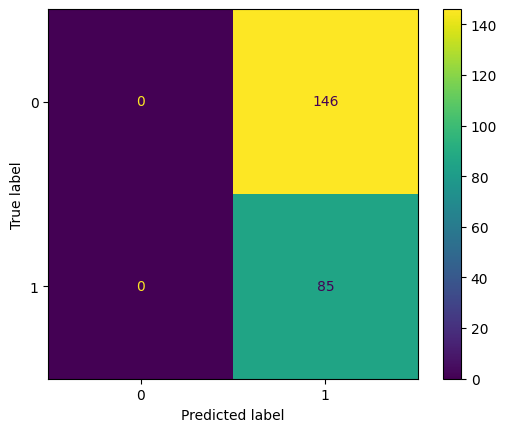


n_neighbors: 11 alog:  ball_tree
Train::  0.7821229050279329
Test::  0.7835497835497836


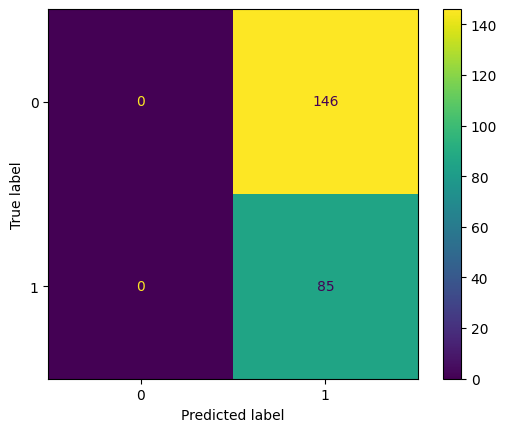


n_neighbors: 11 alog:  kd_tree
Train::  0.7821229050279329
Test::  0.7835497835497836


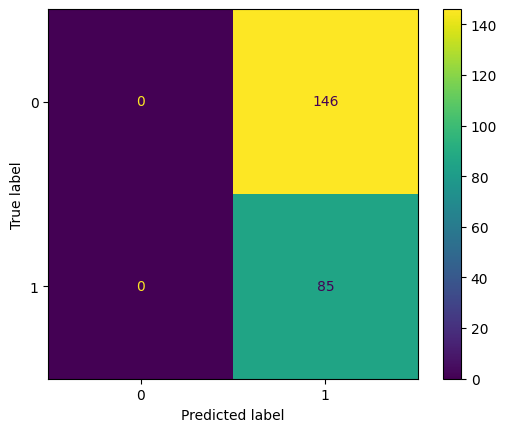


n_neighbors: 11 alog:  brute
Train::  0.7821229050279329
Test::  0.7835497835497836


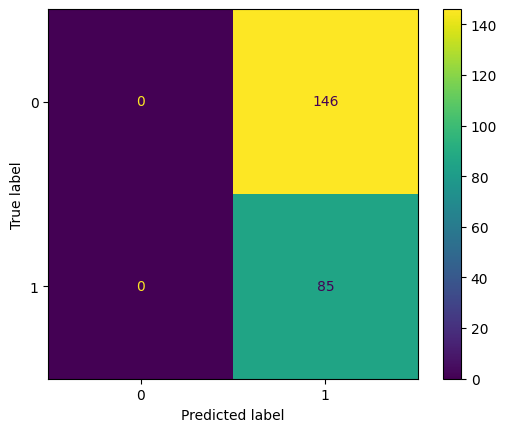


n_neighbors: 12 alog:  ball_tree
Train::  0.7597765363128491
Test::  0.7748917748917749


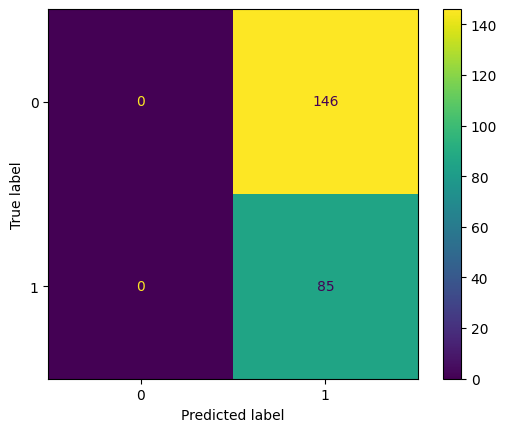


n_neighbors: 12 alog:  kd_tree
Train::  0.7597765363128491
Test::  0.7748917748917749


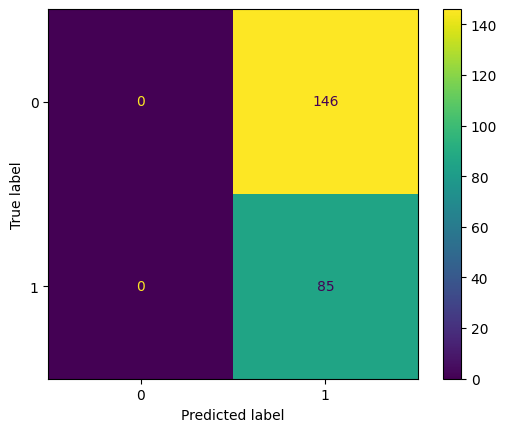


n_neighbors: 12 alog:  brute
Train::  0.7597765363128491
Test::  0.7748917748917749


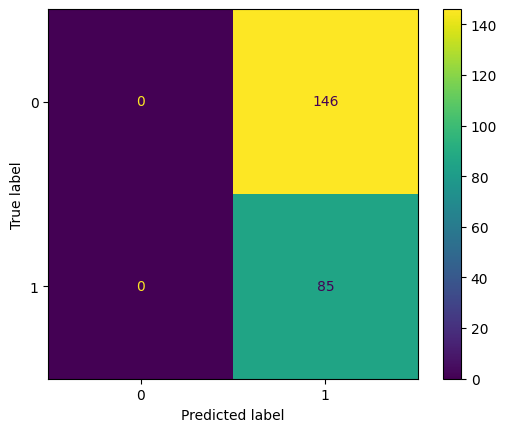


n_neighbors: 13 alog:  ball_tree
Train::  0.7802607076350093
Test::  0.7792207792207793


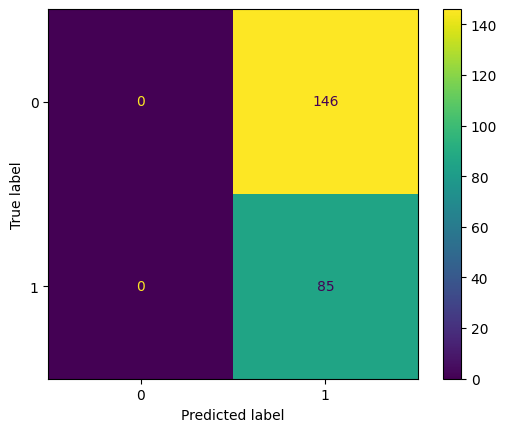


n_neighbors: 13 alog:  kd_tree
Train::  0.7802607076350093
Test::  0.7792207792207793


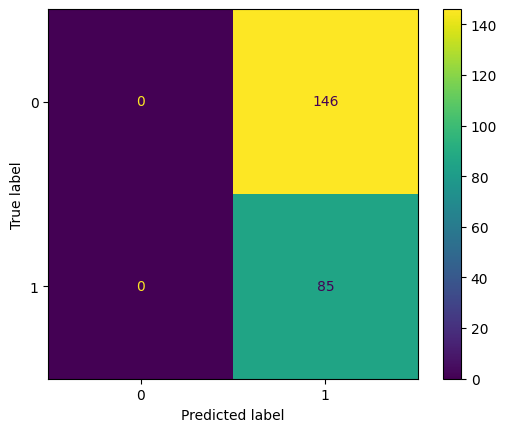


n_neighbors: 13 alog:  brute
Train::  0.7802607076350093
Test::  0.7792207792207793


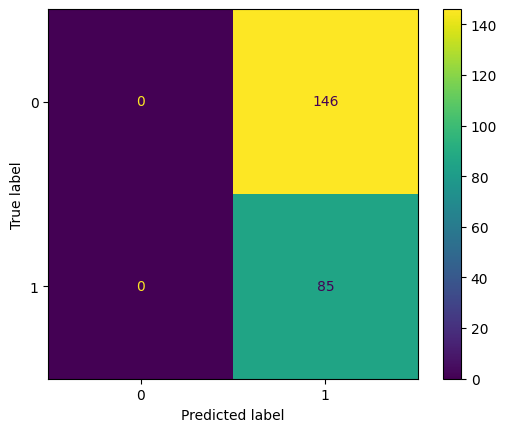


n_neighbors: 14 alog:  ball_tree
Train::  0.770949720670391
Test::  0.7835497835497836


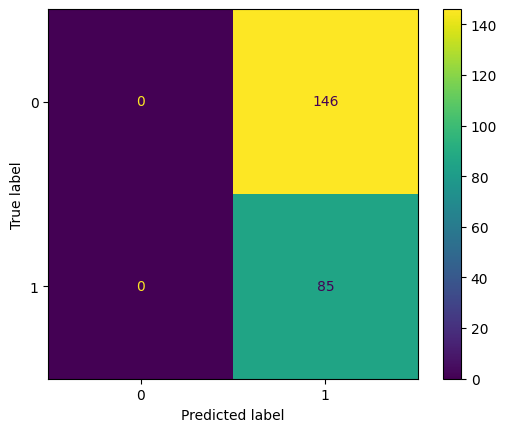


n_neighbors: 14 alog:  kd_tree
Train::  0.770949720670391
Test::  0.7835497835497836


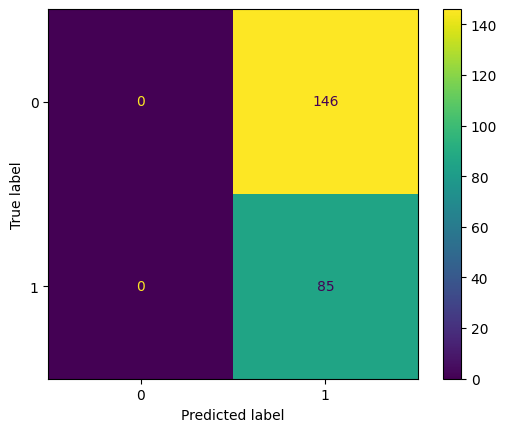


n_neighbors: 14 alog:  brute
Train::  0.770949720670391
Test::  0.7835497835497836


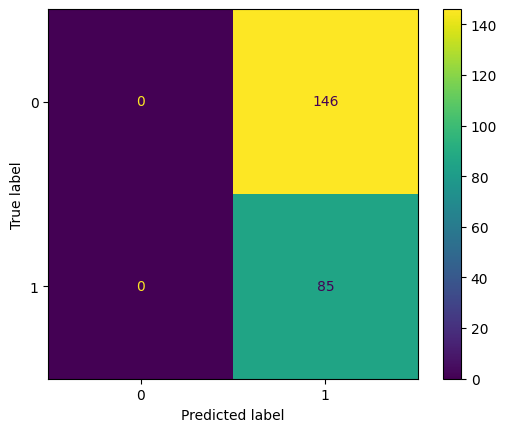


n_neighbors: 15 alog:  ball_tree
Train::  0.7746741154562383
Test::  0.7922077922077922


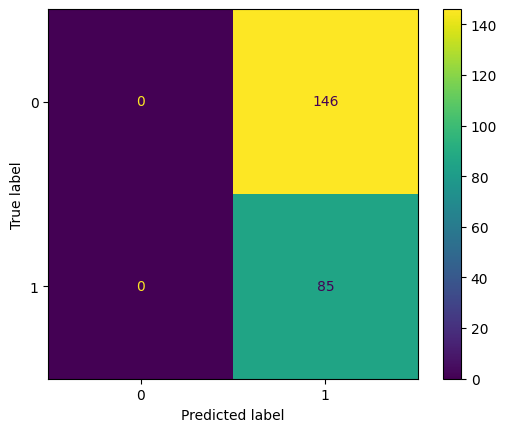


n_neighbors: 15 alog:  kd_tree
Train::  0.7746741154562383
Test::  0.7922077922077922


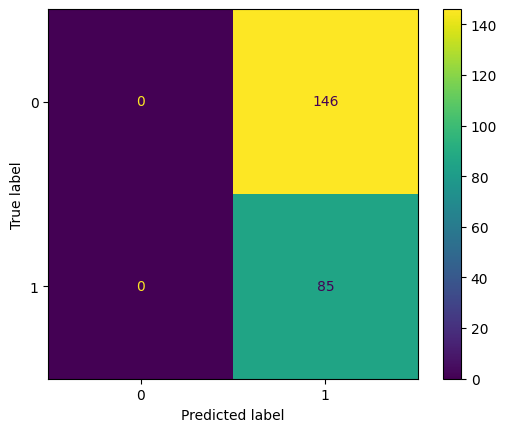


n_neighbors: 15 alog:  brute
Train::  0.7746741154562383
Test::  0.7922077922077922


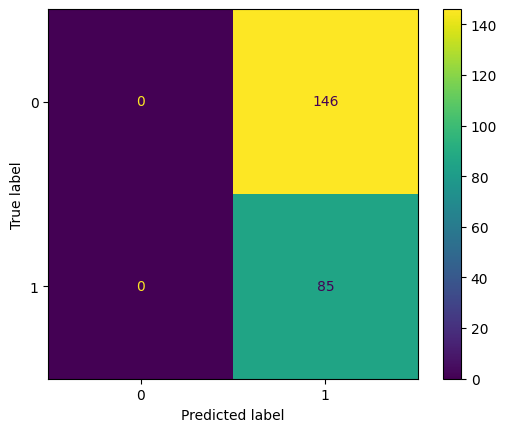


n_neighbors: 16 alog:  ball_tree
Train::  0.7597765363128491
Test::  0.7748917748917749


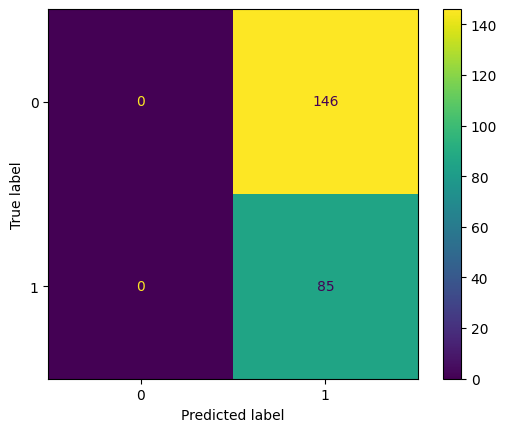


n_neighbors: 16 alog:  kd_tree
Train::  0.7597765363128491
Test::  0.7748917748917749


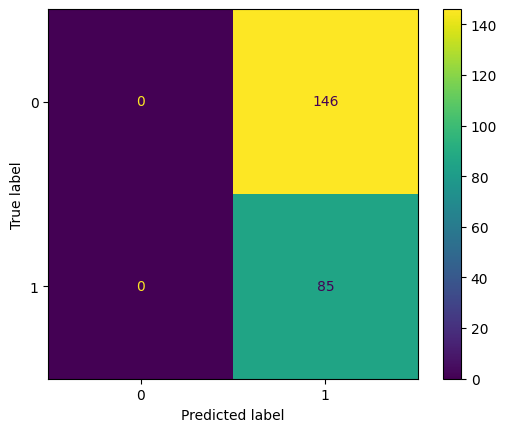


n_neighbors: 16 alog:  brute
Train::  0.7597765363128491
Test::  0.7748917748917749


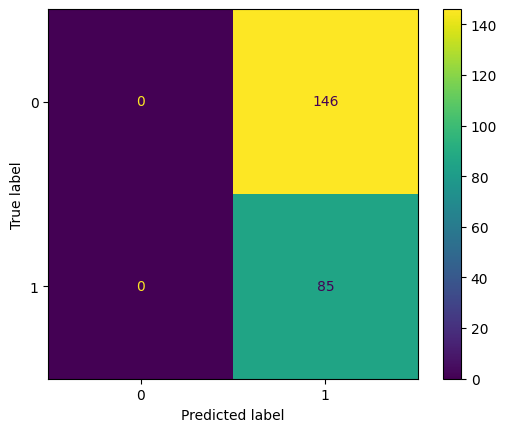


n_neighbors: 17 alog:  ball_tree
Train::  0.7616387337057728
Test::  0.7922077922077922


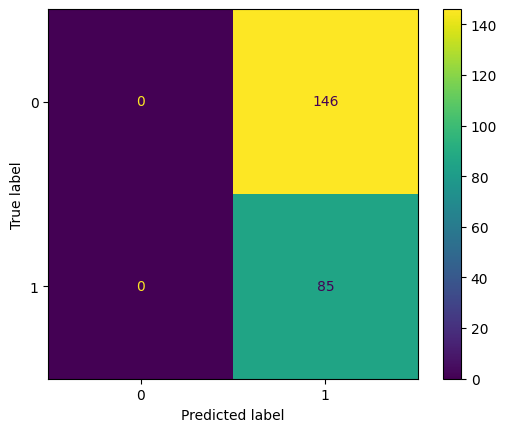


n_neighbors: 17 alog:  kd_tree
Train::  0.7616387337057728
Test::  0.7922077922077922


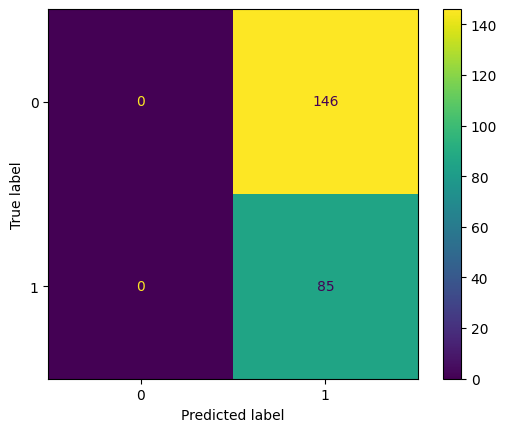


n_neighbors: 17 alog:  brute
Train::  0.7616387337057728
Test::  0.7922077922077922


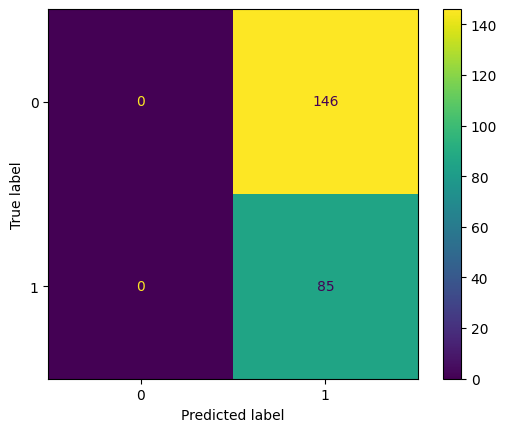


n_neighbors: 18 alog:  ball_tree
Train::  0.7541899441340782
Test::  0.7619047619047619


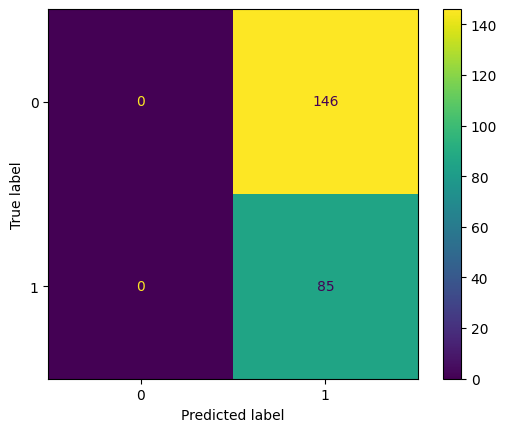


n_neighbors: 18 alog:  kd_tree
Train::  0.7541899441340782
Test::  0.7619047619047619


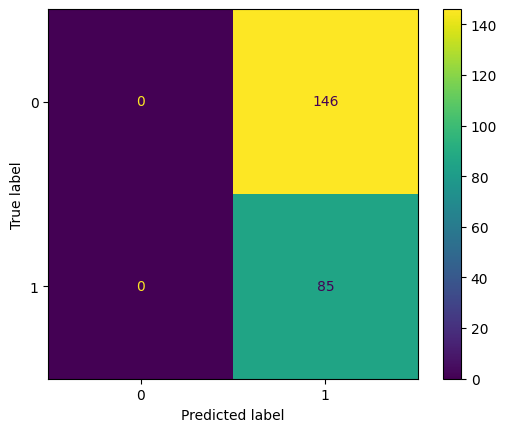


n_neighbors: 18 alog:  brute
Train::  0.7541899441340782
Test::  0.7619047619047619


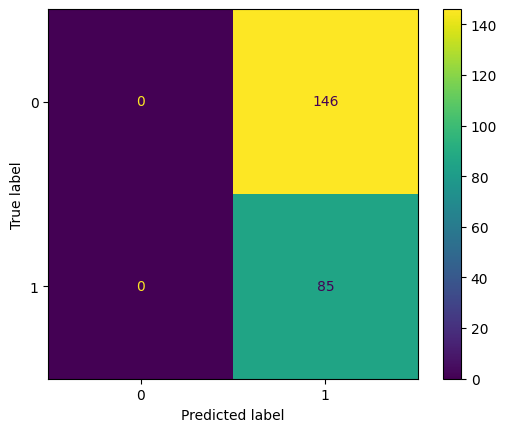


n_neighbors: 19 alog:  ball_tree
Train::  0.7579143389199255
Test::  0.7792207792207793


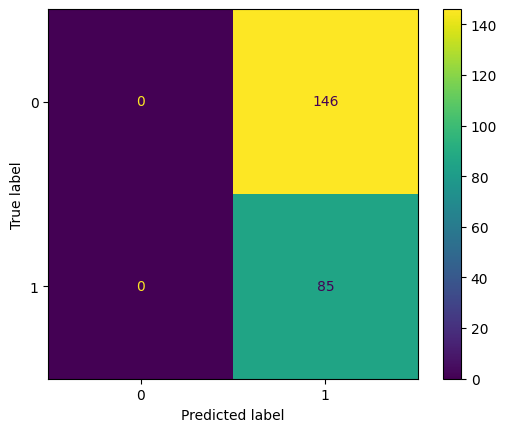


n_neighbors: 19 alog:  kd_tree
Train::  0.7579143389199255
Test::  0.7792207792207793


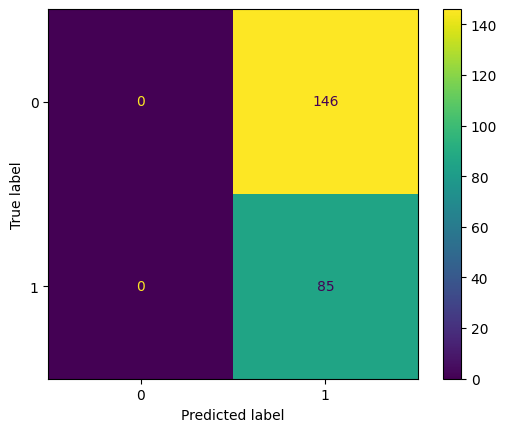


n_neighbors: 19 alog:  brute
Train::  0.7579143389199255
Test::  0.7792207792207793


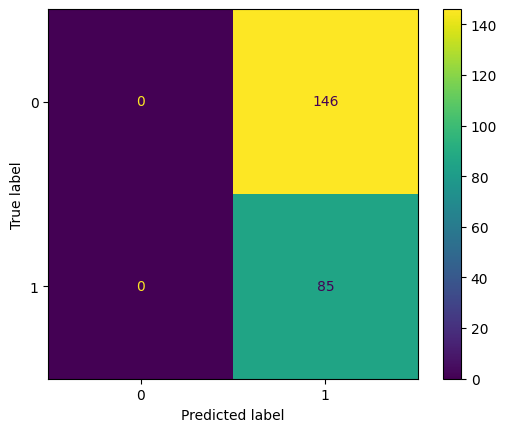


n_neighbors: 20 alog:  ball_tree
Train::  0.7560521415270018
Test::  0.7619047619047619


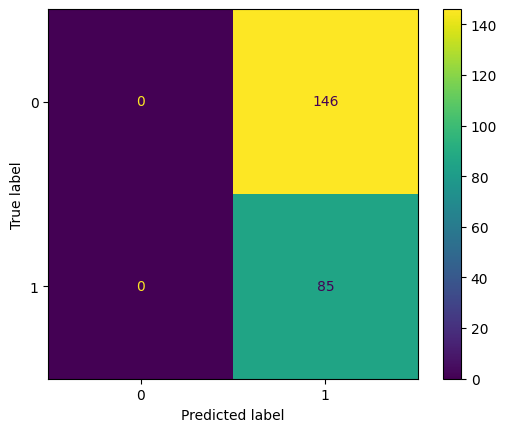


n_neighbors: 20 alog:  kd_tree
Train::  0.7560521415270018
Test::  0.7619047619047619


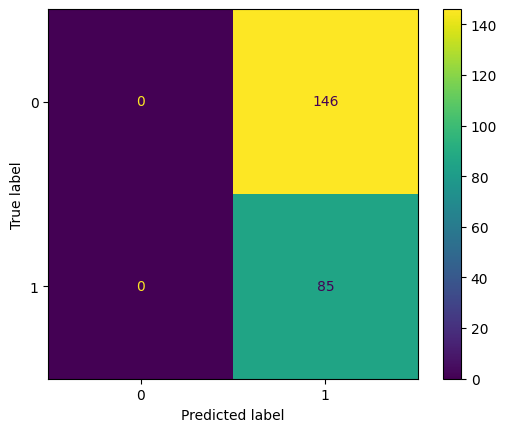


n_neighbors: 20 alog:  brute
Train::  0.7560521415270018
Test::  0.7619047619047619


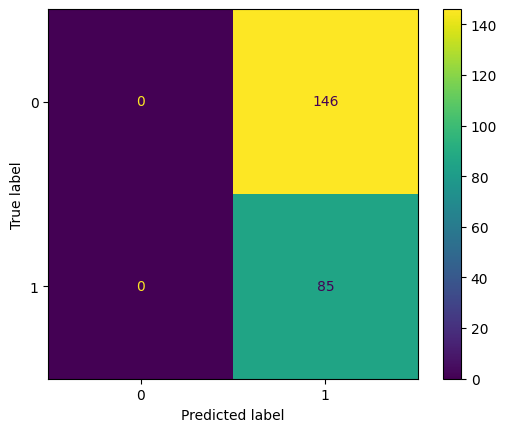

In [76]:
std_Y = std_df[["class"]]
std_X = std_df.drop(["class"], axis = 1)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


X_std_train, X_std_test, Y_std_train, Y_std_test = train_test_split(std_X,std_Y,test_size=.30, random_state=1)

for n in [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
    for alog in ['ball_tree', 'kd_tree', 'brute']:
        model_knn = KNeighborsClassifier(n_neighbors=n,algorithm=alog)
        model_knn.fit(X_std_train, Y_std_train)
        print("\nn_neighbors:", n, "alog: ", alog)
        print("Train:: ",  model_knn.score(X_std_train,Y_std_train))
        print("Test:: ", model_knn.score(X_std_test, Y_std_test))
        y_pred = model_knn.predict(X_test)
        # Confusion matrix oluşturma
        cm = confusion_matrix(Y_test, y_pred)
        cm = confusion_matrix(Y_test, y_pred)
        conf = ConfusionMatrixDisplay(cm)
        conf.plot()
        plt.show()
        

In [24]:
# n_neighbors: 5 alog:  ball_tree

model_knn = KNeighborsClassifier(n_neighbors=5,algorithm='ball_tree')
model_knn.fit(X_std_train, Y_std_train)
print("\nn_neighbors:", n, "alog: ", alog)
print("Train:: ",  model_knn.score(X_std_train,Y_std_train))
print("Test:: ", model_knn.score(X_std_test, Y_std_test))
y_pred = model_knn.predict(X_std_test)
# Confusion matrix oluşturma
cm = confusion_matrix(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)
conf = ConfusionMatrixDisplay(cm)
conf.plot()
plt.show()

NameError: name 'KNeighborsClassifier' is not defined

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model_lr.predict(X_test)
# Confusion matrix oluşturma
cm = confusion_matrix(Y_test, y_pred)
cm

array([[132,  14],
       [ 32,  53]])

In [26]:
numeric_columns.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [27]:
cleaned_median_df = zero_removal_df

for outlier_col in outliers_columns:
    lower, upper = remove_outlier(cleaned_median_df[outlier_col])
    cleaned_median_df[outlier_col] = np.where(cleaned_median_df[outlier_col]>upper, upper, cleaned_median_df[outlier_col])
    cleaned_median_df[outlier_col] = np.where(cleaned_median_df[outlier_col]<lower, lower, cleaned_median_df[outlier_col])
    
cleaned_median_df.sample(5)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
423,0.148148,0.458065,0.37500,0.347222,0.000000,0.393136,0.305704,0.000000,0.0
29,0.370370,0.470968,0.81250,0.375000,0.000000,0.496100,0.230838,0.373626,0.0
534,0.074074,0.212903,0.25000,0.569444,0.176031,0.471139,1.000000,0.065934,0.0
475,0.000000,0.600000,0.68750,0.486111,0.000000,0.283931,0.136364,0.835165,0.0
606,0.074074,0.883871,0.59375,0.902778,0.921022,0.680187,1.000000,0.021978,1.0


In [28]:
cleaned_median_df.dtypes

Preg     float64
Plas     float64
Pres     float64
skin     float64
test     float64
mass     float64
pedi     float64
age      float64
class    float64
dtype: object

In [29]:
Y=cleaned_median_df["class"]
# X=df.drop(["test"])
X = cleaned_median_df.drop(["class"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

# Instantiate the model
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)
# Fit the model with the train data
print("Logistic median after outliers removal")
print("Test::", model_lr.score(X_test, Y_test))
print("Train::", model_lr.score(X_train, Y_train))

Logistic median after outliers removal
Test:: 0.7792207792207793
Train:: 0.7690875232774674


In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Set display options to show all columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

#Linear regression models import
from sklearn.linear_model import LogisticRegression

# to split the data
from sklearn.model_selection import train_test_split

df = pd.read_csv("pima-indians-diabetes-2.csv")
df.sample(10)


Y=df["class"]
# X=df.drop(["test"])
X = df.drop(["class"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)

LogisticRegression()

In [31]:
df.sample(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
541,3,128,72,25,190,32.4,0.549,27,1
24,11,143,94,33,146,36.6,0.254,51,1
760,2,88,58,26,16,28.4,0.766,22,0
567,6,92,62,32,126,32.0,0.085,46,0
297,0,126,84,29,215,30.7,0.520,24,0
638,7,97,76,32,91,40.9,0.871,32,1
11,10,168,74,0,0,38.0,0.537,34,1
658,11,127,106,0,0,39.0,0.190,51,0
702,1,168,88,29,0,35.0,0.905,52,1
281,10,129,76,28,122,35.9,0.280,39,0


In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

Y=df["class"]
# X=df.drop(["test"])
X = df.drop(["class"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

# Instantiate the model
model_dtr = DecisionTreeRegressor(max_depth=2)
model_dtr.fit(X_train, Y_train)
# Fit the model with the train data
print("DecisionTreeRegression")
print("Test::", model_dtr.score(X_test, Y_test))
print("Train::", model_dtr.score(X_train, Y_train))


model_dtr = DecisionTreeClassifier(max_depth=2)
model_dtr.fit(X_train, Y_train)
# Fit the model with the train data
print("DecisionTreeClassifier")
print("Test::", model_dtr.score(X_test, Y_test))
print("Train::", model_dtr.score(X_train, Y_train))

DecisionTreeRegression
Test:: 0.25331511875018875
Train:: 0.23883710374932166
DecisionTreeClassifier
Test:: 0.7575757575757576
Train:: 0.7635009310986964


In [34]:
df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [35]:

model_dtr = DecisionTreeClassifier(max_depth=4, criterion='entropy', splitter="random")
model_dtr.fit(X_train, Y_train)
# Fit the model with the train data
print("DecisionTreeClassifier")
print("Test::", model_dtr.score(X_test, Y_test))
print("Train::", model_dtr.score(X_train, Y_train))

DecisionTreeClassifier
Test:: 0.7489177489177489
Train:: 0.7374301675977654


In [36]:
Y=cleaned_median_df["class"]
# X=df.drop(["test"])
X = cleaned_median_df.drop(["class"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

# Instantiate the model
model_dtr = DecisionTreeRegressor()
model_dtr.fit(X_train, Y_train)
# Fit the model with the train data
print("DecisionTreeRegressor with Cleaned")
print("Test::", model_dtr.score(X_test, Y_test))
print("Train::", model_dtr.score(X_train, Y_train))

model_dtr = DecisionTreeClassifier(max_depth=3)
model_dtr.fit(X_train, Y_train)
# Fit the model with the train data
print("DecisionTreeClassifier with Cleaned")
print("Test::", model_dtr.score(X_test, Y_test))
print("Train::", model_dtr.score(X_train, Y_train))

DecisionTreeRegressor with Cleaned
Test:: -0.34020950846091824
Train:: 1.0
DecisionTreeClassifier with Cleaned
Test:: 0.7532467532467533
Train:: 0.7635009310986964


In [38]:
Y=std_df["class"]
# X=df.drop(["test"])
X = std_df.drop(["class"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

# Instantiate the model
model_dtr = DecisionTreeRegressor()
model_dtr.fit(X_train, Y_train)
# Fit the model with the train data
print("DecisionTreeRegressor with Cleaned")
print("Test::", model_dtr.score(X_test, Y_test))
print("Train::", model_dtr.score(X_train, Y_train))


model_dtr = DecisionTreeClassifier()
model_dtr.fit(X_train, Y_train)
# Fit the model with the train data
print("DecisionTreeClassifier with Cleaned")
print("Test::", model_dtr.score(X_test, Y_test))
print("Train::", model_dtr.score(X_train, Y_train))

DecisionTreeRegressor with Cleaned
Test:: -0.24713940370668785
Train:: 1.0
DecisionTreeClassifier with Cleaned
Test:: 0.696969696969697
Train:: 1.0


In [39]:
from sklearn.ensemble import BaggingClassifier

for n in [1,2,3,5,6,10,20,22,25,30,40,50, 100]:
    modle_lgr = BaggingClassifier(n_estimators=n, estimator=model_dtr)
    modle_lgr.fit(X_train, Y_train)
    print("\n n_estimators ", n)
    print("Train:: ",  modle_lgr.score(X_train,Y_train))
    print("Test:: ", modle_lgr.score(X_test, Y_test))


 n_estimators  1
Train::  0.9106145251396648
Test::  0.7012987012987013

 n_estimators  2
Train::  0.8640595903165735
Test::  0.7012987012987013

 n_estimators  3
Train::  0.9385474860335196
Test::  0.7445887445887446

 n_estimators  5
Train::  0.9590316573556797
Test::  0.7359307359307359

 n_estimators  6
Train::  0.9776536312849162
Test::  0.7792207792207793

 n_estimators  10
Train::  0.9832402234636871
Test::  0.7532467532467533

 n_estimators  20
Train::  0.994413407821229
Test::  0.7445887445887446

 n_estimators  22
Train::  0.9962756052141527
Test::  0.7489177489177489

 n_estimators  25
Train::  0.9906890130353817
Test::  0.7705627705627706

 n_estimators  30
Train::  0.9962756052141527
Test::  0.7575757575757576

 n_estimators  40
Train::  1.0
Test::  0.7922077922077922

 n_estimators  50
Train::  0.9981378026070763
Test::  0.7705627705627706

 n_estimators  100
Train::  1.0
Test::  0.7705627705627706


In [ ]:
# import gradio as gr

# # Preg	Plas	Pres	skin	test	mass	pedi	age	class
# def predict_survival(Preg,Plas,Pres,skin,test,mass, pedi, age):
# #     sex_encoded=label_encoder.transform([Sex])[0]
#     prediction=model_lr.predict([[Preg,Plas,Pres,skin,test,mass, pedi, age]])[0]
#     return "Test postive" if prediction ==1 else "Negative"


# interface=gr.Interface(
#     fn=predict_survival,
#     inputs=[
#     gr.components.Number(label="Preg"),
#     gr.components.Number(label="Plas"),
#     gr.components.Number(label="Pres"),
#     gr.components.Number(label="skin"),
#     gr.components.Number(label="test"),
#     gr.components.Number(label="mass"),
#     gr.components.Number(label="pedi"),
#     gr.components.Number(label="age")
#     ],
#     outputs="text",
#     title="Diabetis Survival",
#     description="Enter passenger info to predict survival"
#  )

# interface.launch(debug=True)

# 	Preg	Plas	Pres	skin	test	mass	pedi	age	class
# 	1	93	56	11	0	22.5	0.417	22	0
# 	2	100	64	23	0	29.7	0.368	21	0
# 	1	130	60	23	170	28.6	0.692	21	0
# 	7	159	64	0	0	27.4	0.294	40	0
# 	1	116	70	2b8	0	27.4	0.204	21	0
# 	6	144	72	27	228	33.9	0.255	40	0
# 	1	105	58	0	0	24.3	0.187	21	0
# 	9	152	78	34	171	34.2	0.893	33	1
# 	5	99	54	28	83	34.0	0.499	30	0
# 	0	121	66	30	165	34.3	0.203	33	1

In [ ]:
zero_mean_removal_df.columns

In [40]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()

std_zero_mean_removal_df = zero_mean_removal_df


for col in ['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age']:
    std_zero_mean_removal_df[col] = std_scale.fit_transform(std_zero_mean_removal_df[[col]])

std_zero_mean_removal_df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,0.647150,0.866045,-0.030632,0.933847,-0.787602,0.181733,0.588927,1.445691,1.0
1,-0.848970,-1.205066,-0.543914,0.223108,-0.787602,-0.868800,-0.378101,-0.189304,0.0
2,1.245598,2.016662,-0.715008,-0.487630,-0.787602,-1.364051,0.746595,-0.103252,1.0
3,-0.848970,-1.073567,-0.543914,-0.487630,0.217583,-0.643686,-1.022787,-1.049828,0.0
4,-1.148194,0.504422,-2.768136,0.933847,1.008900,1.607456,2.596563,-0.017199,1.0


In [41]:
Y=std_zero_mean_removal_df["class"]
# X=df.drop(["test"])
X = std_zero_mean_removal_df.drop(["class"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

# Instantiate the model
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)
# Fit the model with the train data
print("Logistic median after outliers removal")
print("Test::", model_lr.score(X_test, Y_test))
print("Train::", model_lr.score(X_train, Y_train))
# 

Logistic median after outliers removal
Test:: 0.7878787878787878
Train:: 0.776536312849162


In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model_lr.predict(X_test)
# Confusion matrix oluşturma
cm = confusion_matrix(Y_test, y_pred)
cm

array([[131,  15],
       [ 34,  51]])

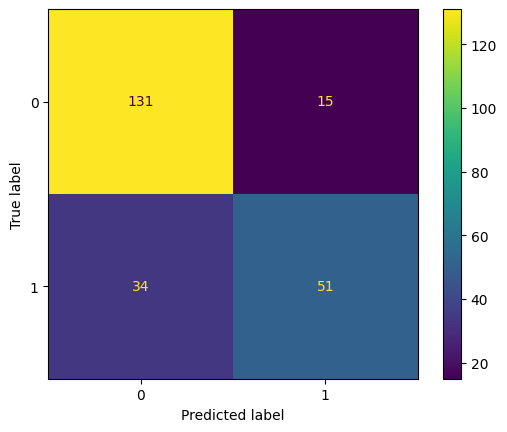

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, y_pred)
conf = ConfusionMatrixDisplay(cm)
conf.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))